In [4]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
data=fetch_20newsgroups()

In [9]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [23]:
categories=[
 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 ]

In [24]:
train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

Importing Vectorizer,Multinomial NB Pipeline adn fitting

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [26]:
model= make_pipeline(TfidfVectorizer(),MultinomialNB())

In [27]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [28]:
labels=model.predict(test.data)

Checking the performance 

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
mat=confusion_matrix(test.target,labels)

<Axes: >

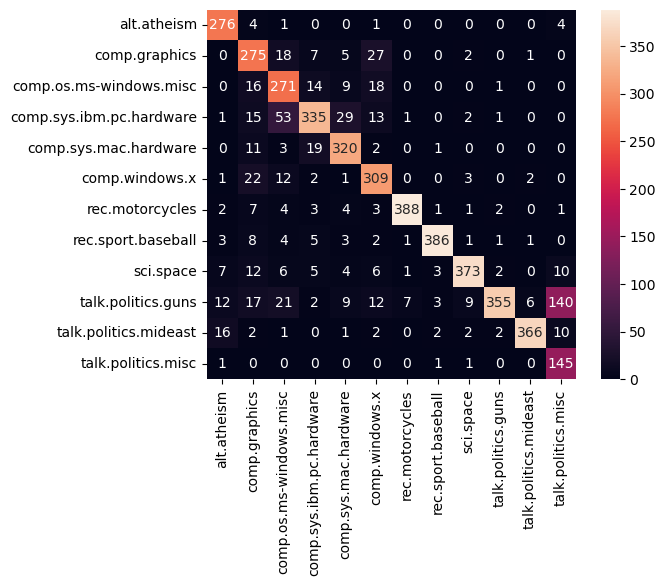

In [55]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,xticklabels=train.target_names,yticklabels=train.target_names)

In [38]:
def predict_cat(s,train=train,model=model):
    pred= model.predict([s])
    return train.target_names[pred[0]] 

In [39]:
predict_cat(" The supernova is a dead star")

'sci.space'

In [53]:
predict_cat("political decisions affect basketball, such as funding for public sports facilities and policies on player recruitment.")

'rec.sport.baseball'